In [75]:
#导入相关包
import numpy as np 
import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader 
from torchvision import transforms
from torchvision import datasets
import torch.nn.functional as F 
from torch import optim
from tqdm import tqdm

batch_size=32
learning_rate = 0.0001
epochs = 40
device = torch.device('cpu')
latent_size=16
hidden_size=128
input_size=output_size=28*28

In [36]:
train_loader = torch.utils.data.DataLoader(datasets.MNIST('/data/mnist', train=True, download=True,transform=transforms.ToTensor()),batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(datasets.MNIST('/data/mnist', train=False, transform=transforms.ToTensor()),batch_size=batch_size, shuffle=False)

In [52]:
class Encoder(torch.nn.Module):
    def __init__(self,input_size,hidden_size,latent_size):
        super(Encoder,self).__init__()
        self.linear = torch.nn.Linear(input_size,hidden_size)
        self.mu = torch.nn.Linear(hidden_size,latent_size)
        self.sigma = torch.nn.Linear(hidden_size,latent_size)
    def forward(self,x):
        x = F.relu(self.linear(x))
        mu = self.mu(x)
        sigma = self.sigma(x)
        return mu,sigma
    
class Decoder(torch.nn.Module):
    def __init__(self,latent_size,hidden_size,output_size):
        super(Decoder,self).__init__()
        self.linear1 = torch.nn.Linear(latent_size,hidden_size)
        self.linear2 = torch.nn.Linear(hidden_size,output_size)
    def forward(self,x):
        x = F.relu(self.linear1(x))
        x = torch.sigmoid(self.linear2(x))
        return x
    

In [55]:
class VAE(torch.nn.Module):
    def __init__(self,input_size,output_size,latent_size,hidden_size):
        super(VAE,self).__init__()
        self.encoder=Encoder(input_size,hidden_size,latent_size)
        self.decoder=Decoder(latent_size,hidden_size,output_size)
    def forward(self,x):
        mu,sigma=self.encoder(x)
        eps=torch.randn_like(sigma)
        z=mu+eps*sigma
        re_x=self.decoder(z)
        return re_x,mu,sigma

loss_BCE = torch.nn.BCELoss(reduction='sum')
loss_MSE = torch.nn.MSELoss(reduction='sum')
loss_KLD = lambda mu,sigma:-0.5*torch.sum(1+torch.log(sigma**2)-mu.pow(2)-sigma**2)

#模型参数


[eval]epoch:0: 100%|██████████| 313/313 [00:00<00:00, 337.13it/s, loss=205]


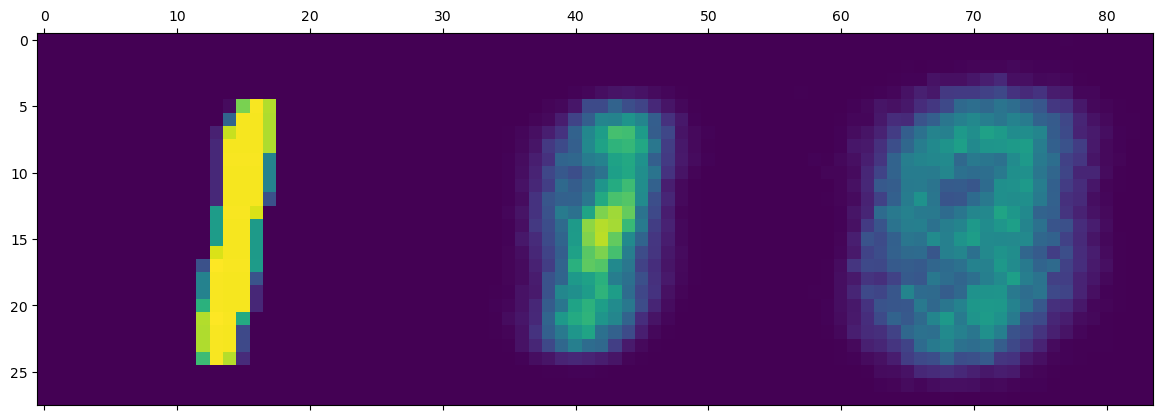

[eval]epoch:1: 100%|██████████| 313/313 [00:00<00:00, 333.86it/s, loss=172]


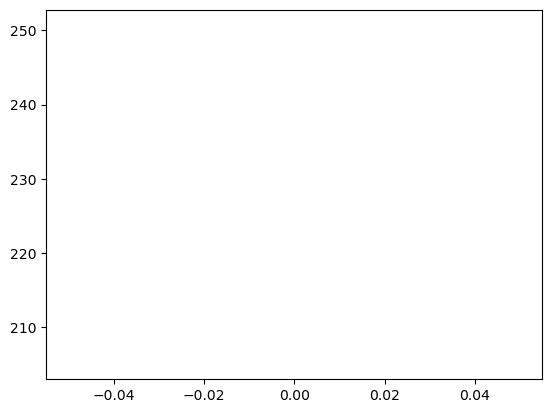

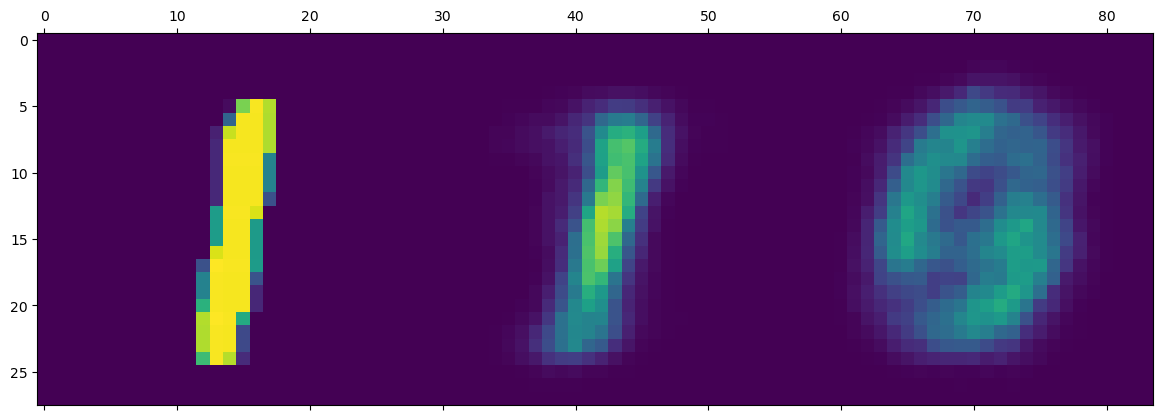

[eval]epoch:2: 100%|██████████| 313/313 [00:01<00:00, 282.43it/s, loss=156]


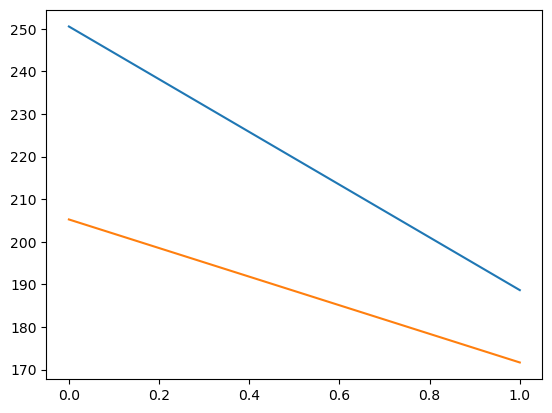

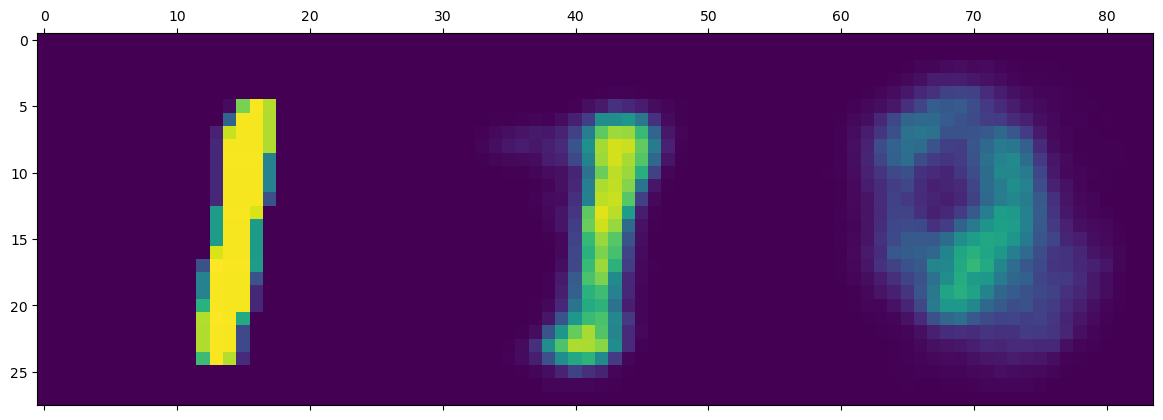

[eval]epoch:3: 100%|██████████| 313/313 [00:01<00:00, 303.42it/s, loss=146]


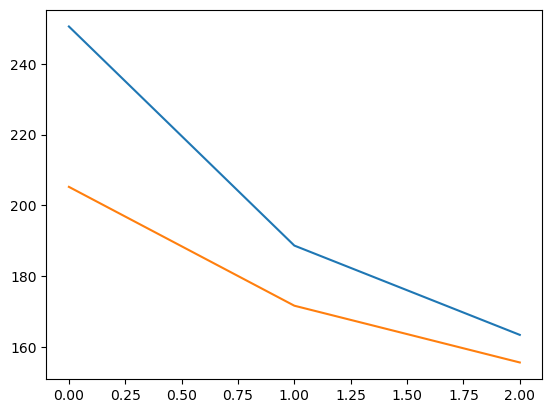

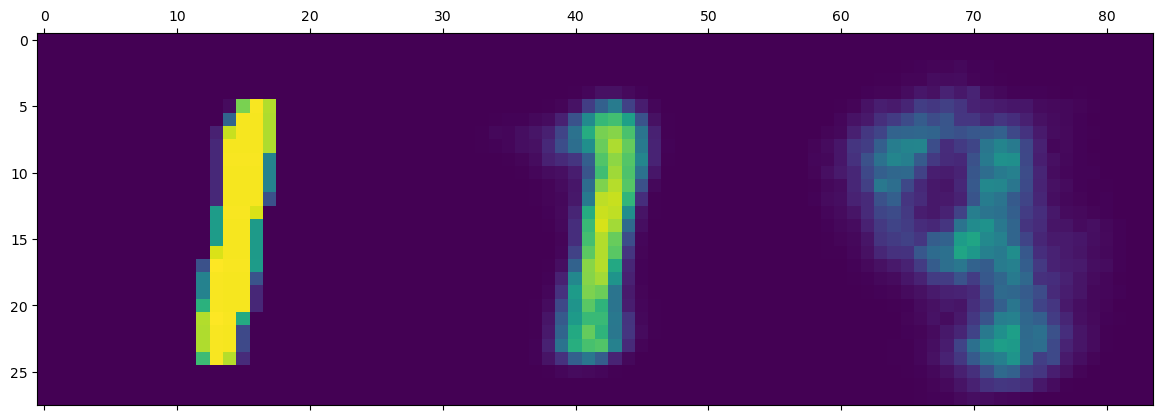

[eval]epoch:4: 100%|██████████| 313/313 [00:00<00:00, 318.75it/s, loss=139]


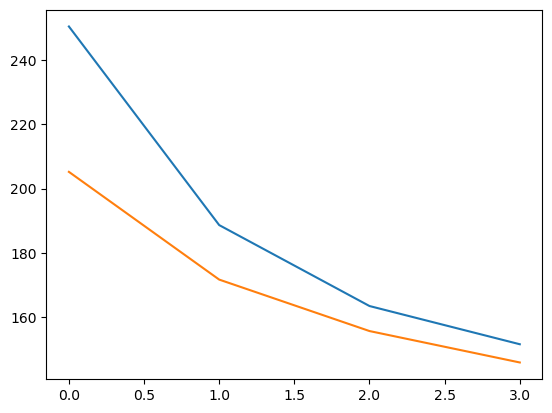

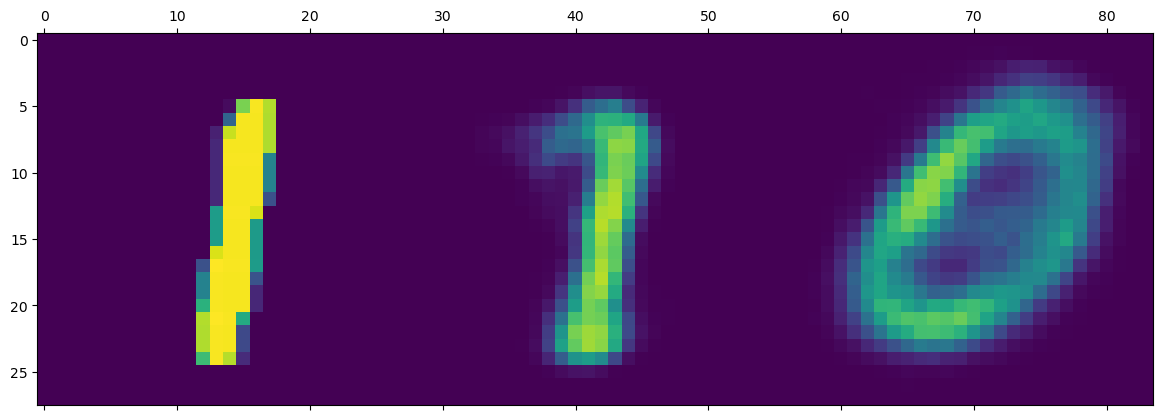

[eval]epoch:5: 100%|██████████| 313/313 [00:00<00:00, 324.98it/s, loss=134]


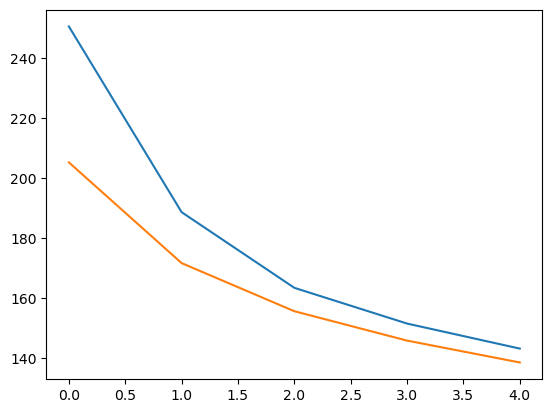

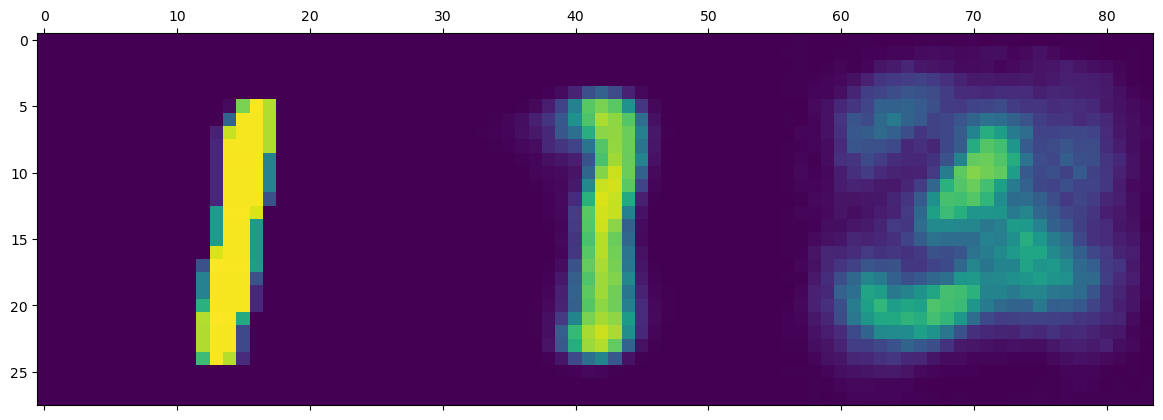

[eval]epoch:6: 100%|██████████| 313/313 [00:00<00:00, 323.12it/s, loss=130]


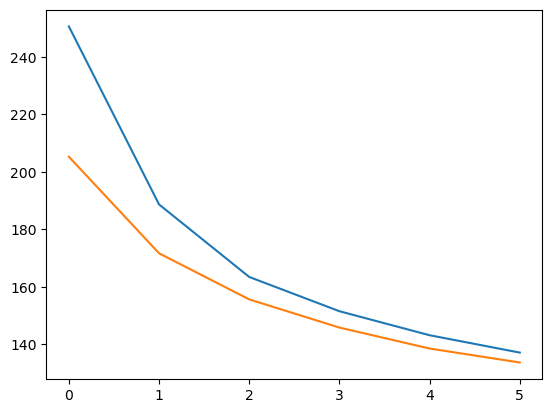

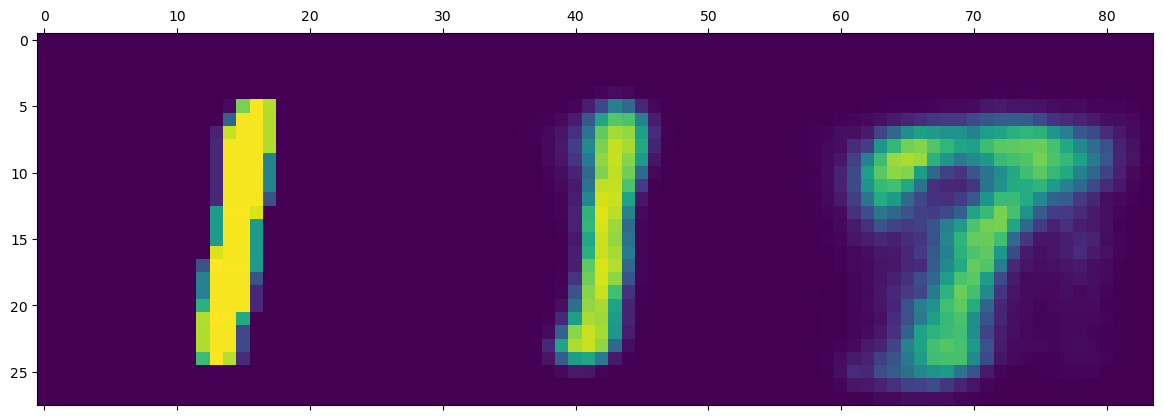

[eval]epoch:7: 100%|██████████| 313/313 [00:00<00:00, 321.23it/s, loss=127]


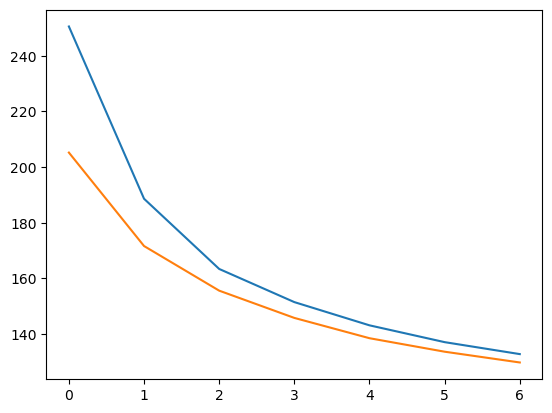

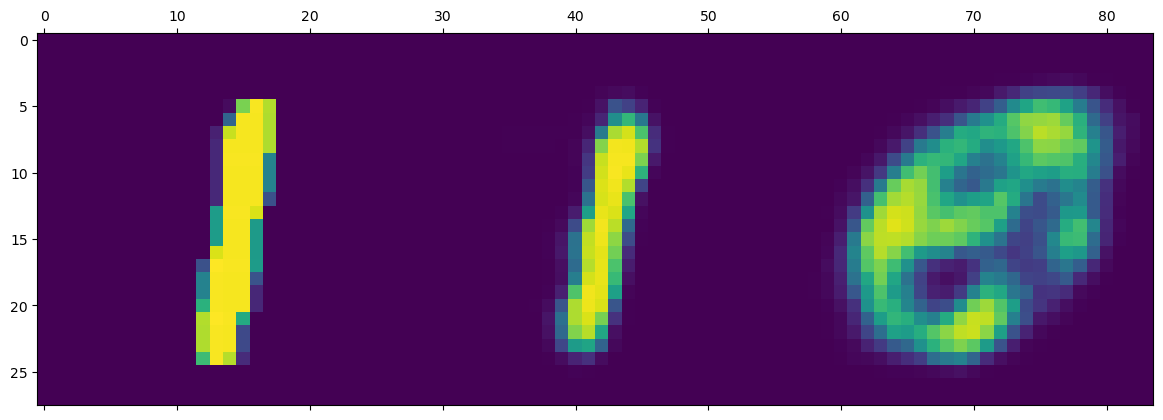

[eval]epoch:8: 100%|██████████| 313/313 [00:01<00:00, 308.06it/s, loss=124]


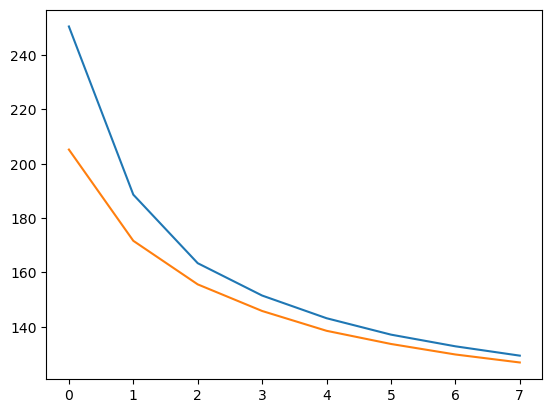

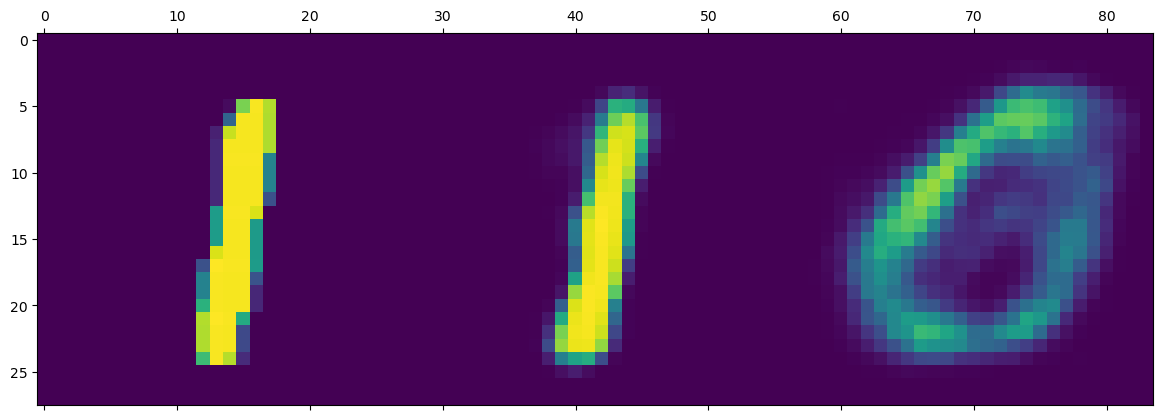

[eval]epoch:9: 100%|██████████| 313/313 [00:00<00:00, 316.52it/s, loss=123]


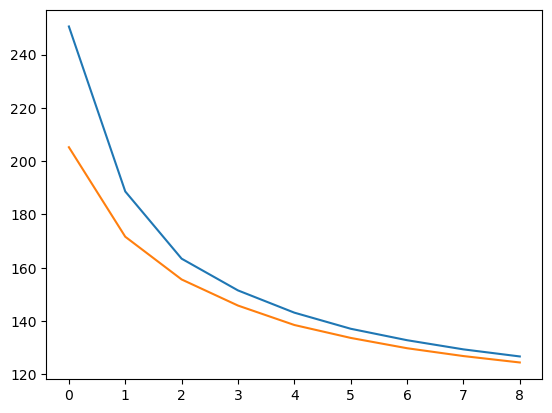

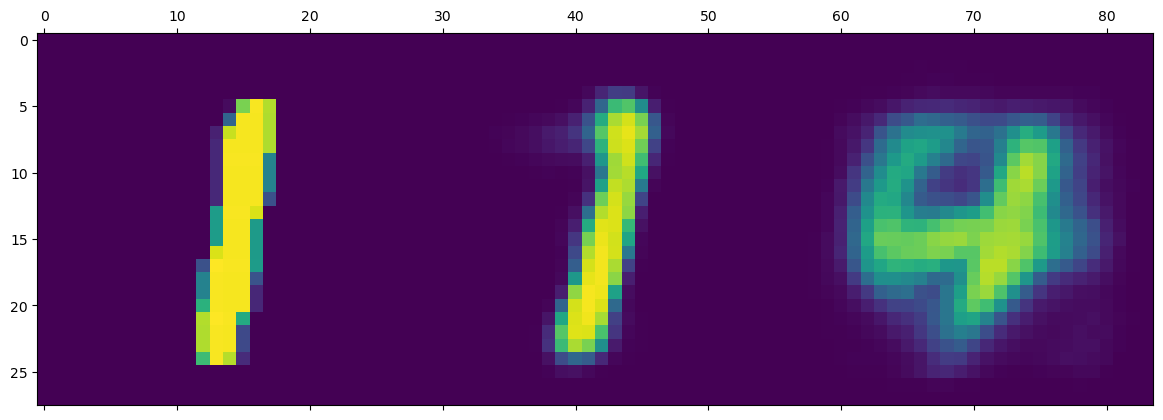

[eval]epoch:10: 100%|██████████| 313/313 [00:01<00:00, 307.17it/s, loss=121]


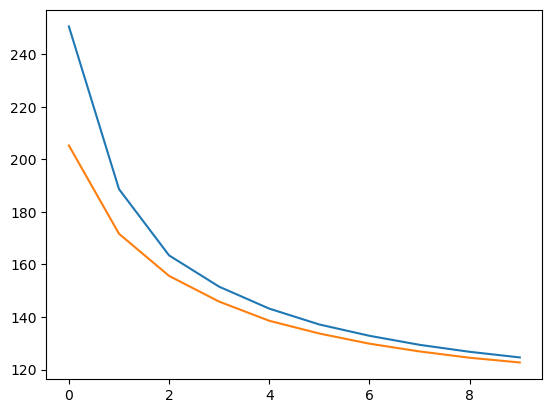

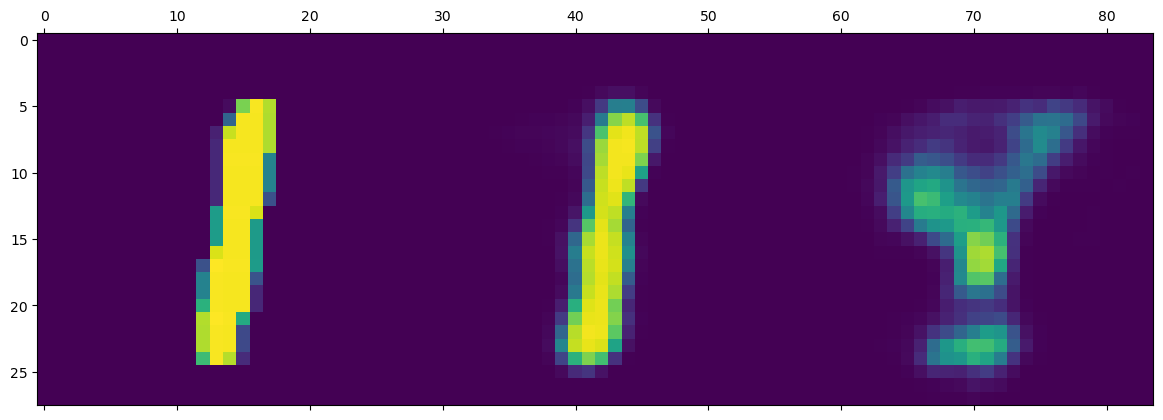

[eval]epoch:11: 100%|██████████| 313/313 [00:00<00:00, 317.49it/s, loss=120]


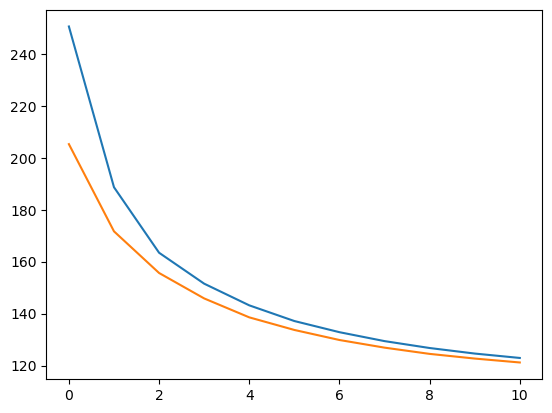

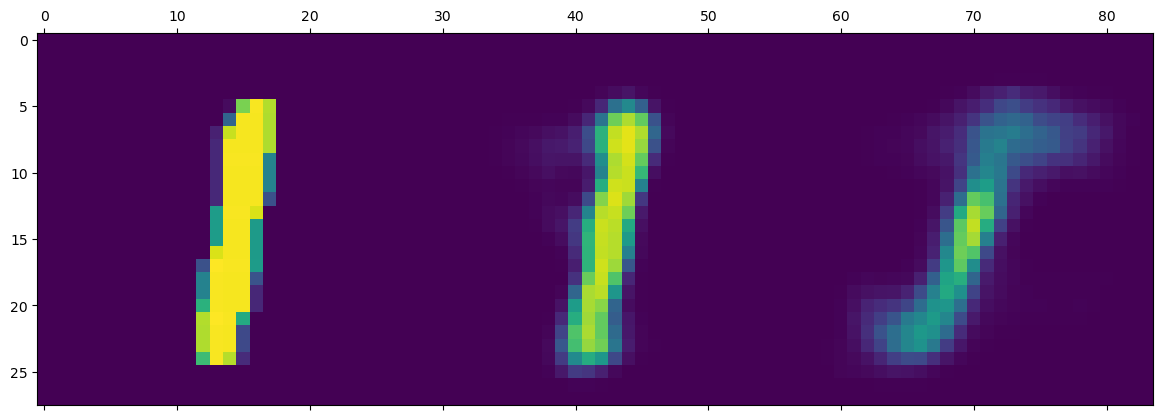

[eval]epoch:12: 100%|██████████| 313/313 [00:01<00:00, 307.16it/s, loss=119]


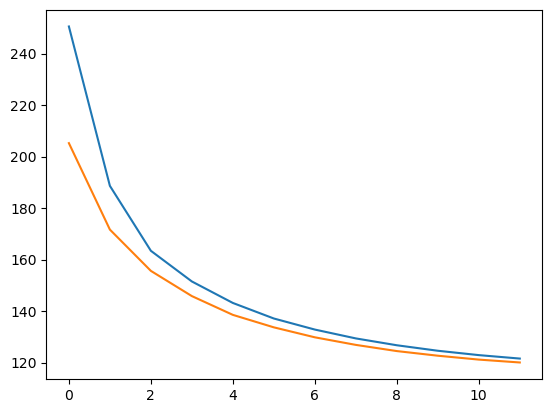

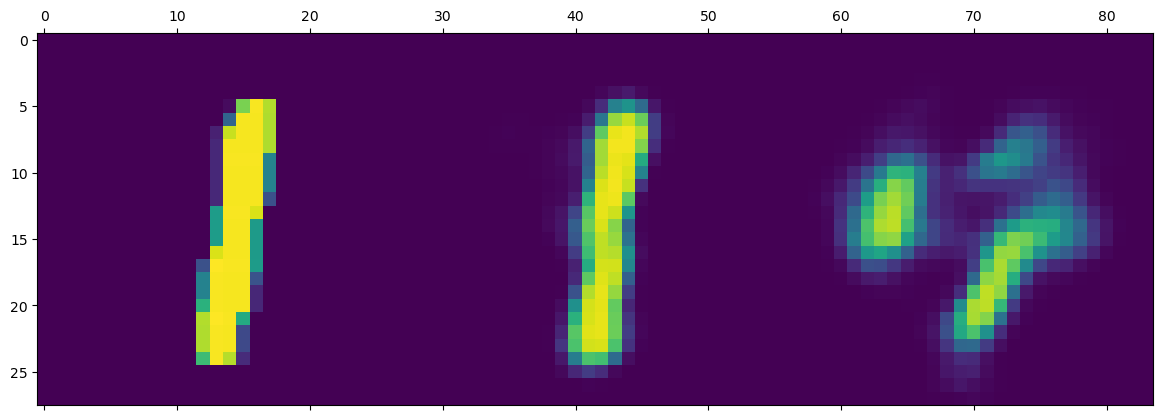

[eval]epoch:13: 100%|██████████| 313/313 [00:00<00:00, 323.16it/s, loss=118]


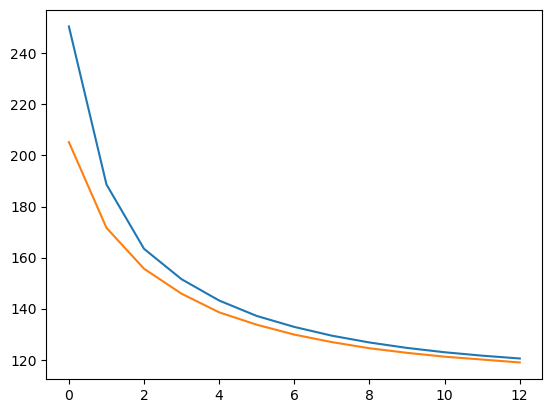

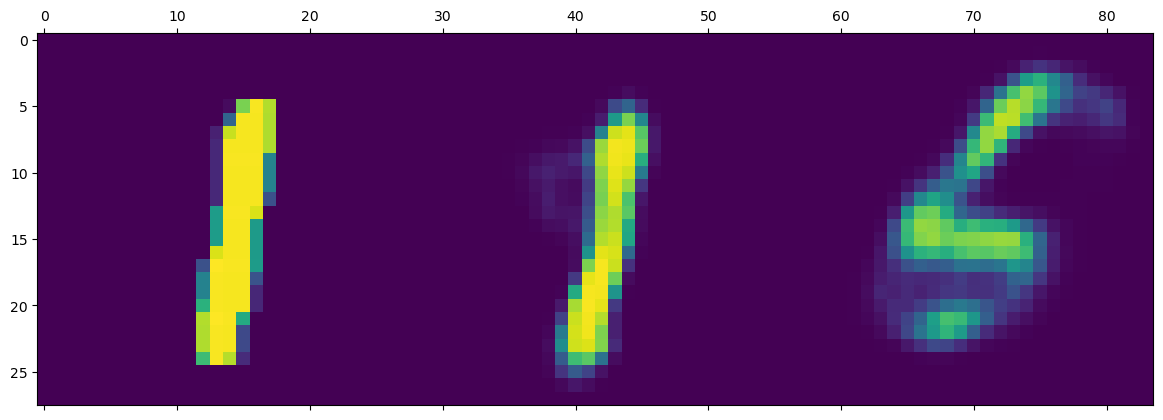

[eval]epoch:14: 100%|██████████| 313/313 [00:00<00:00, 326.14it/s, loss=117]


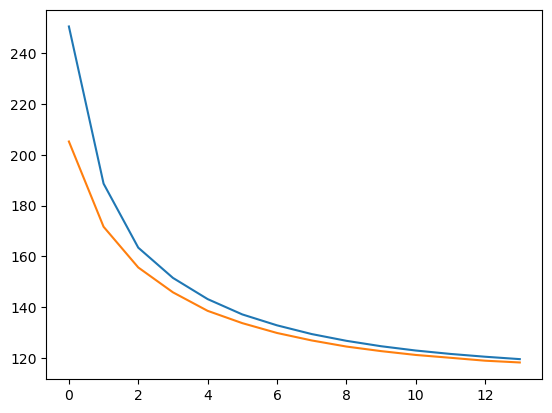

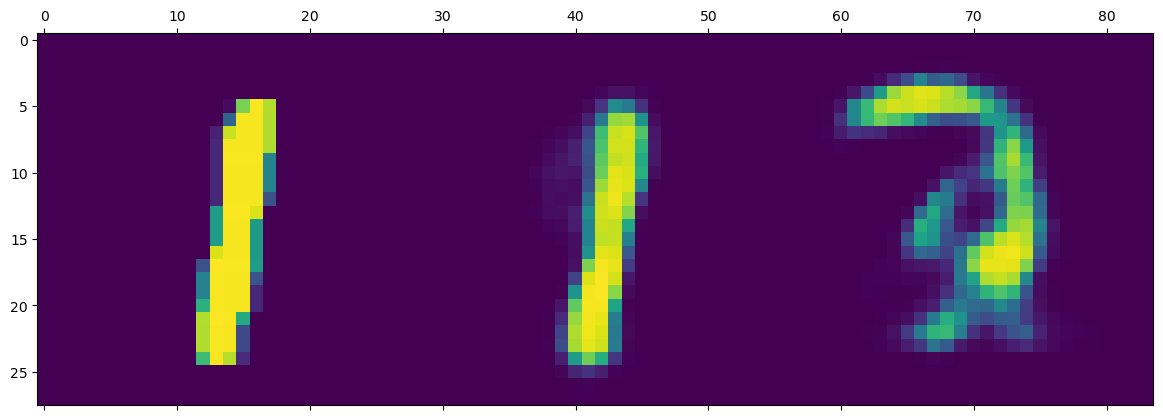

[eval]epoch:15: 100%|██████████| 313/313 [00:00<00:00, 321.24it/s, loss=117]


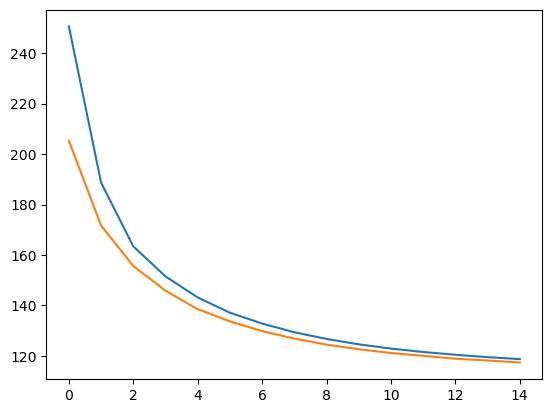

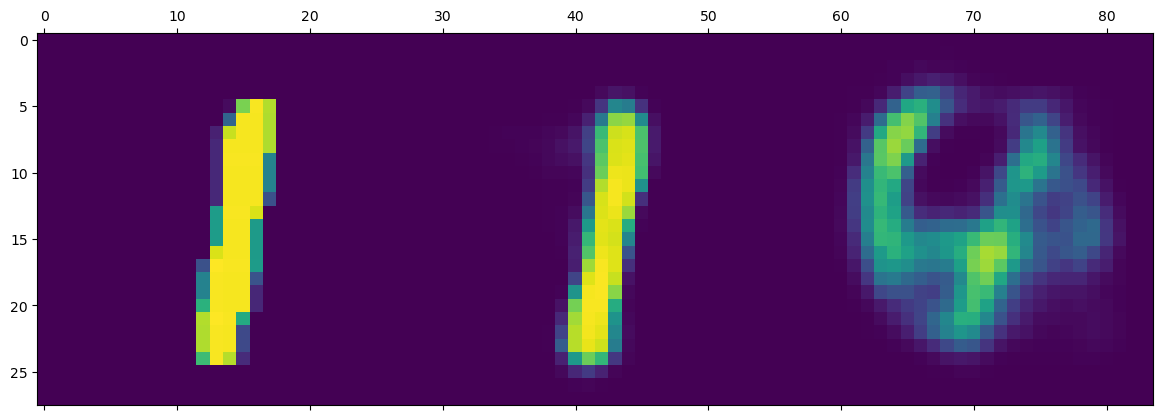

[eval]epoch:16: 100%|██████████| 313/313 [00:00<00:00, 324.81it/s, loss=116]


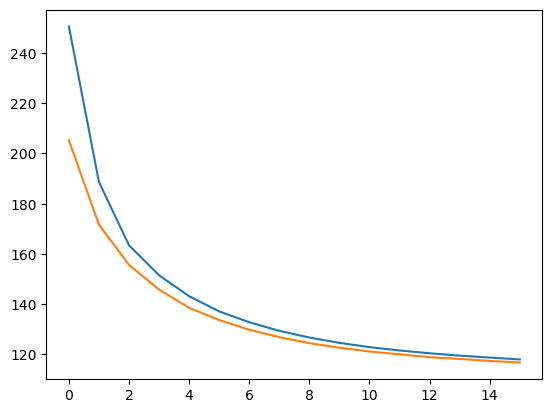

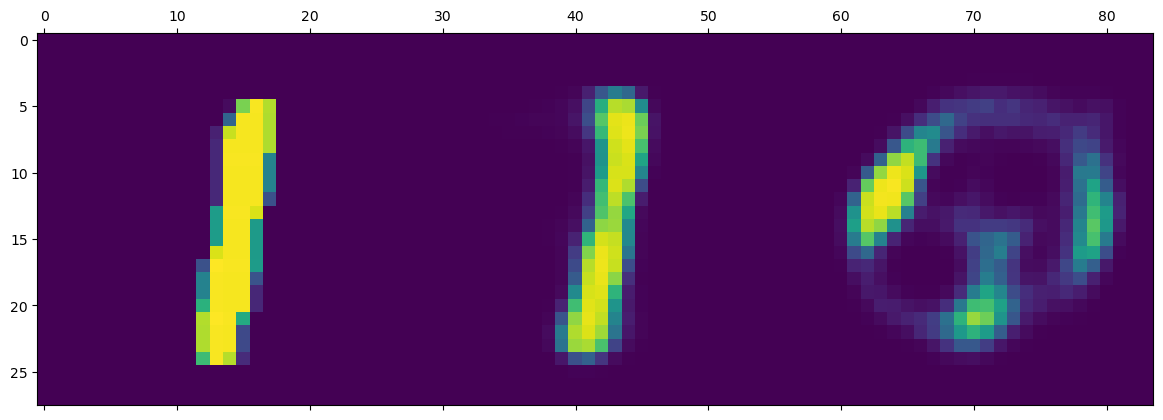

[eval]epoch:17: 100%|██████████| 313/313 [00:01<00:00, 289.87it/s, loss=116]


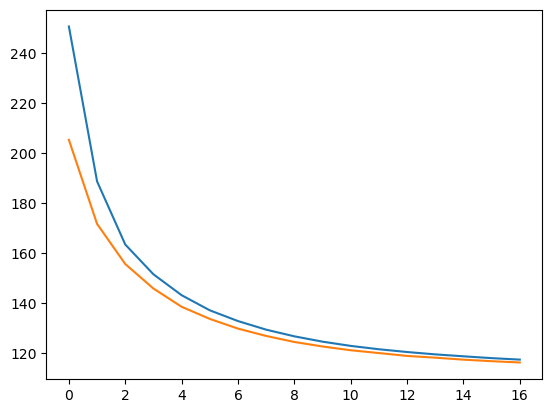

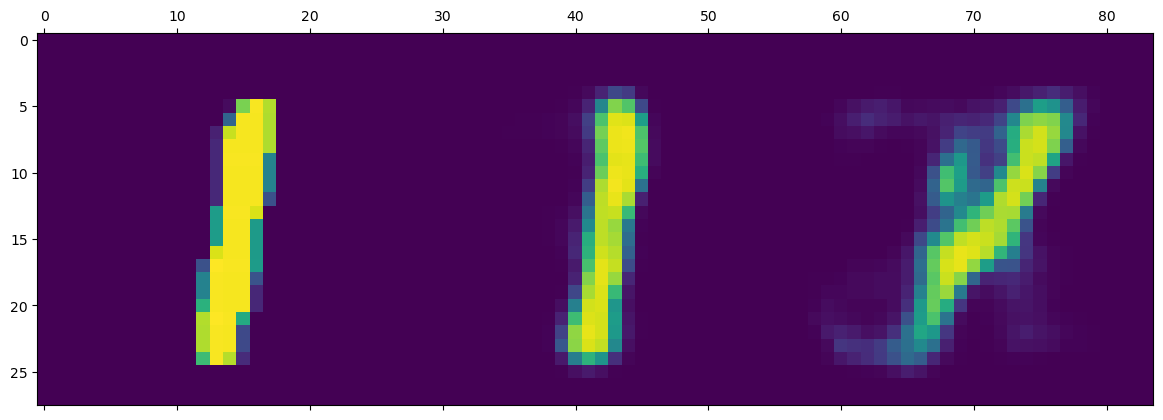

[eval]epoch:18: 100%|██████████| 313/313 [00:00<00:00, 326.00it/s, loss=115]


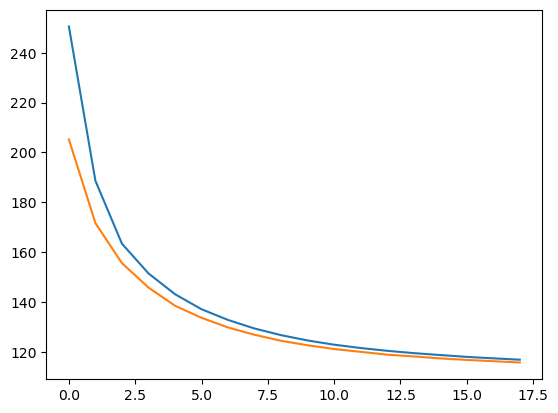

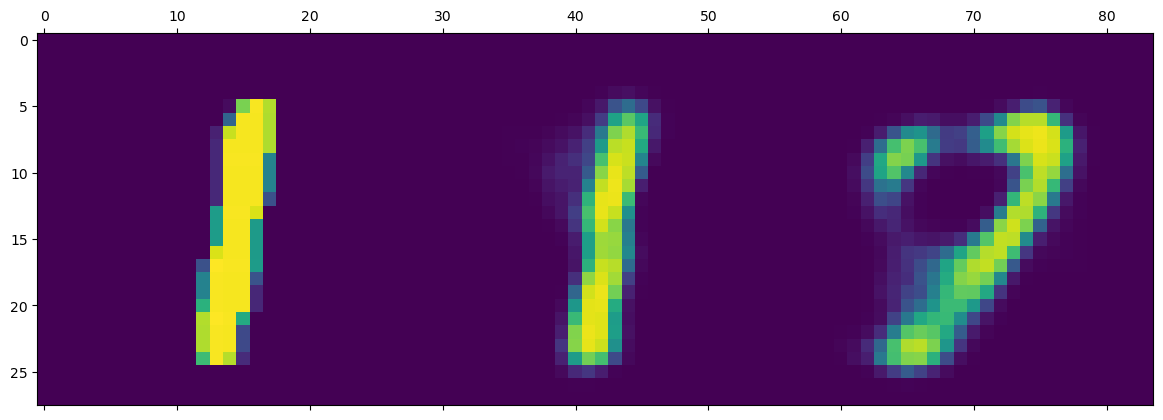

[eval]epoch:19: 100%|██████████| 313/313 [00:01<00:00, 309.72it/s, loss=115]


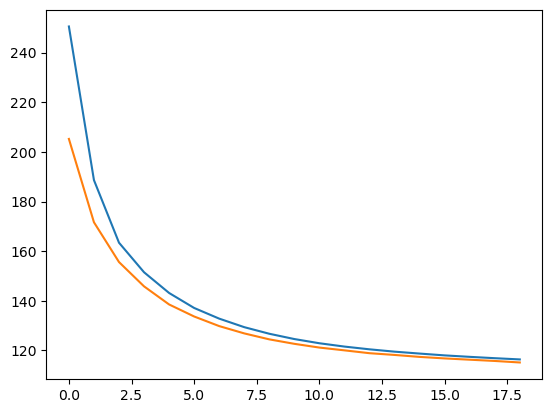

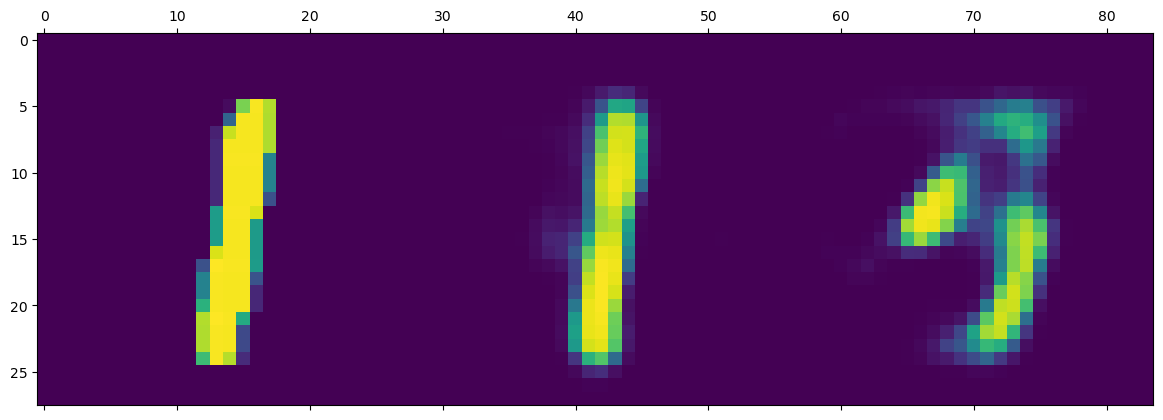

[eval]epoch:20: 100%|██████████| 313/313 [00:01<00:00, 307.41it/s, loss=115]


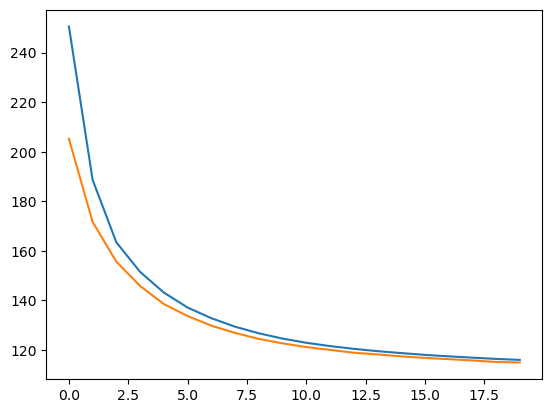

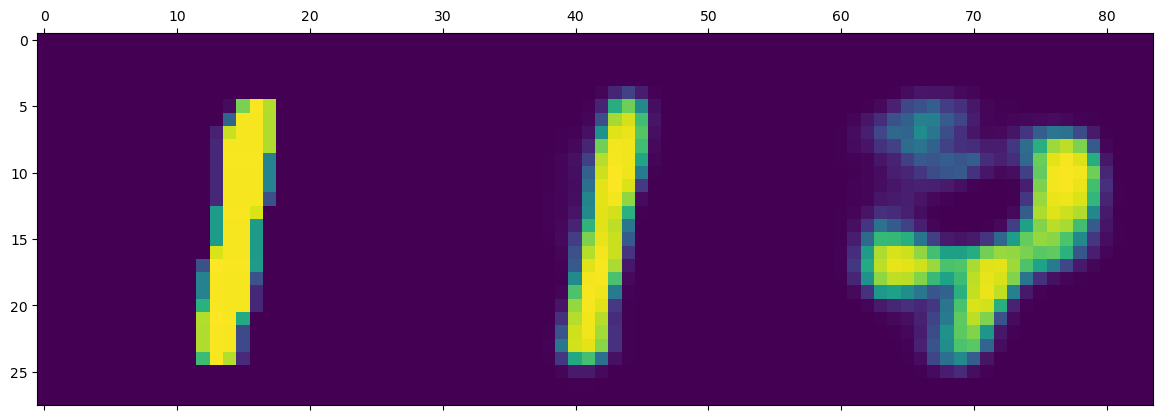

[eval]epoch:21: 100%|██████████| 313/313 [00:01<00:00, 306.71it/s, loss=114]


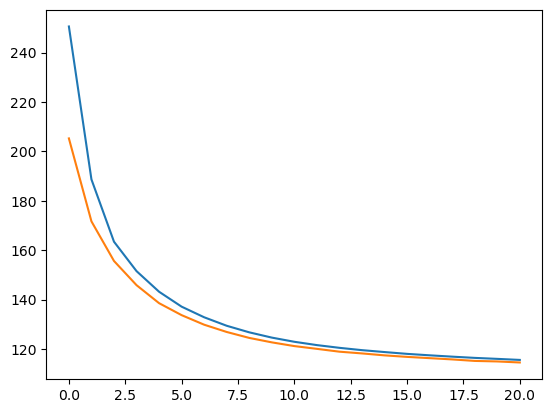

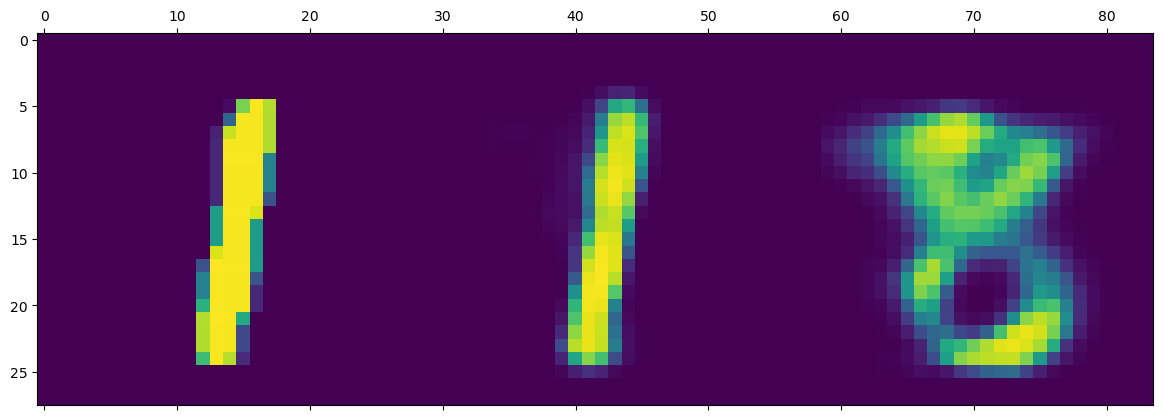

[eval]epoch:22: 100%|██████████| 313/313 [00:01<00:00, 305.07it/s, loss=114]


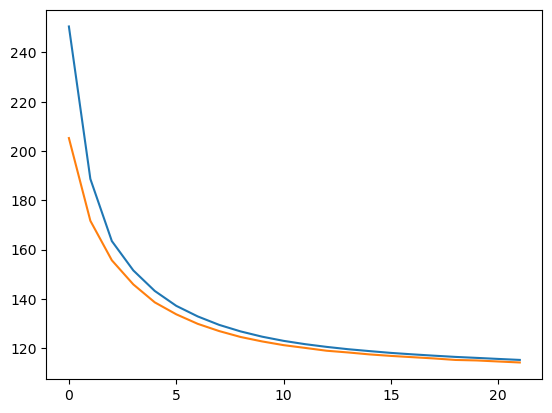

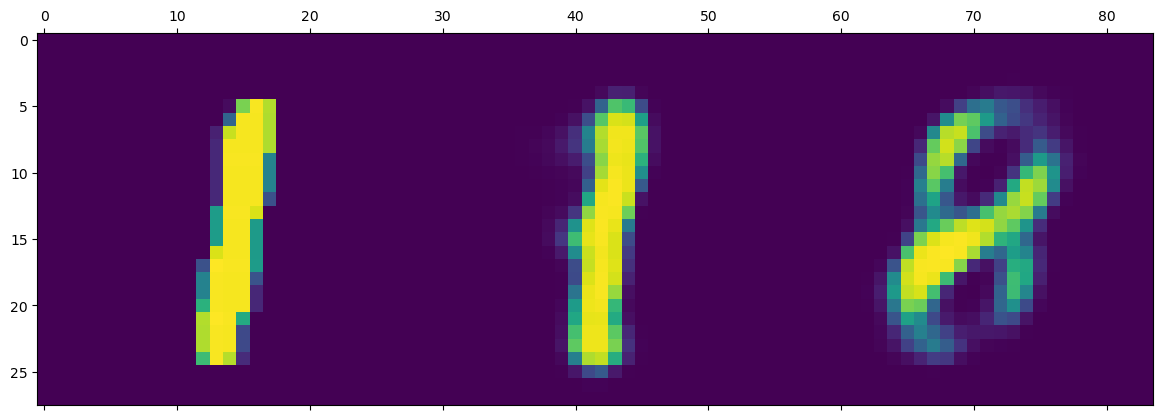

[eval]epoch:23: 100%|██████████| 313/313 [00:00<00:00, 340.35it/s, loss=114]


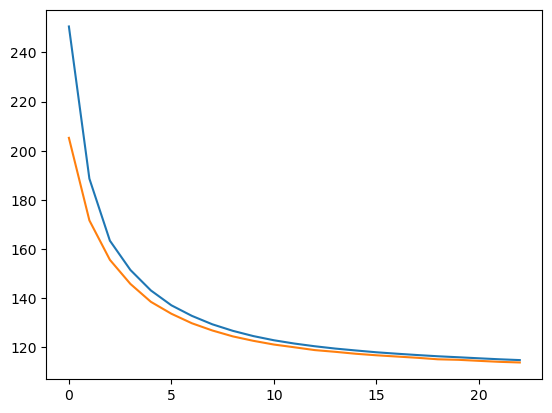

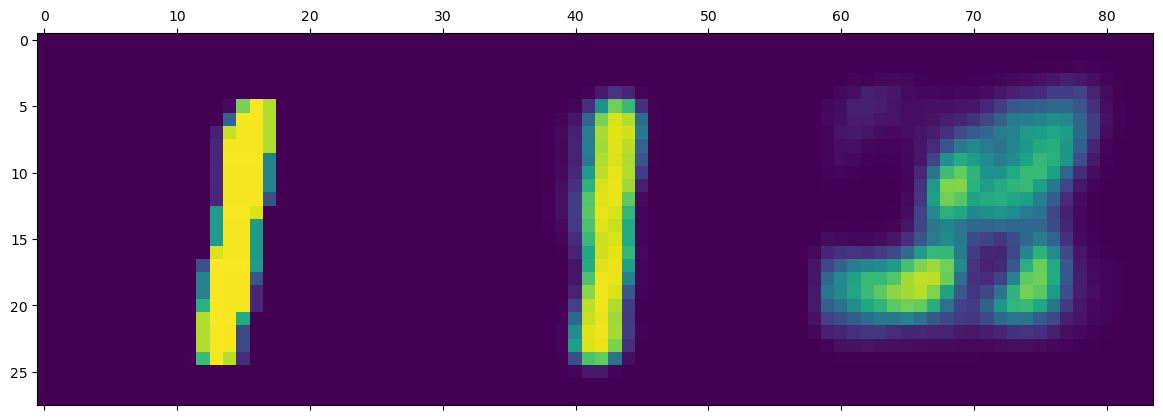

[eval]epoch:24: 100%|██████████| 313/313 [00:00<00:00, 315.02it/s, loss=113]


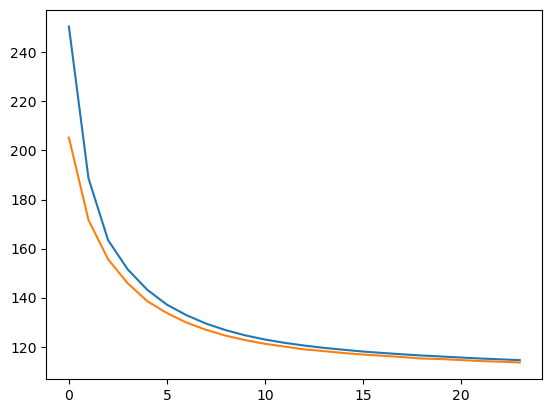

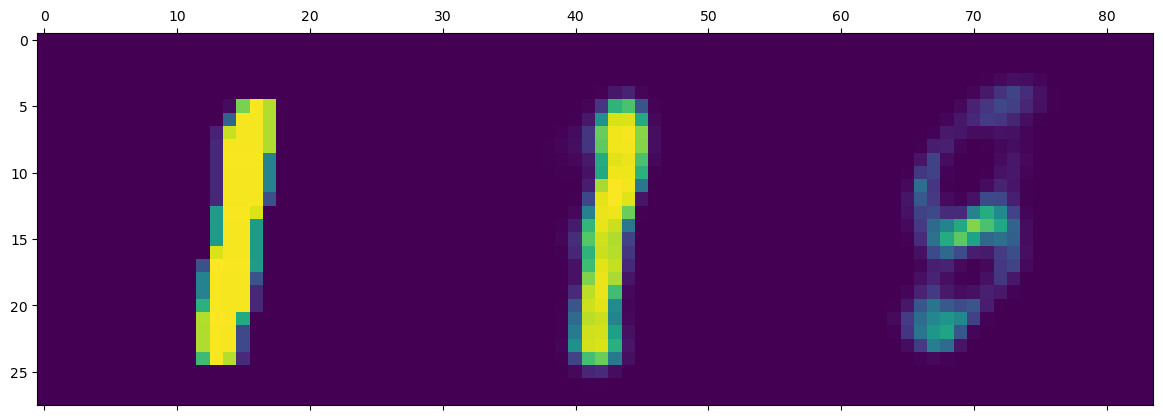

[eval]epoch:25: 100%|██████████| 313/313 [00:00<00:00, 324.39it/s, loss=113]


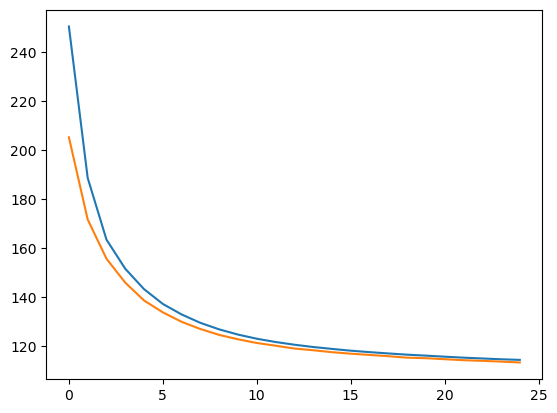

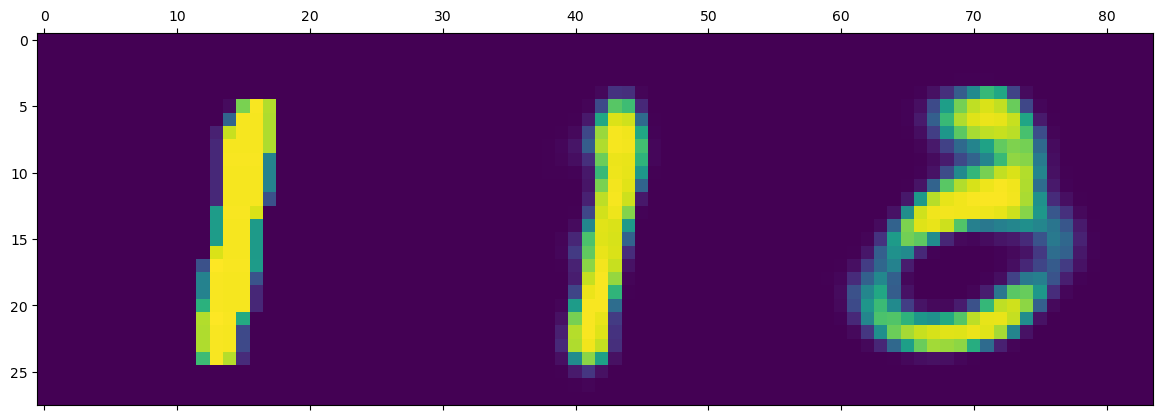

[eval]epoch:26: 100%|██████████| 313/313 [00:01<00:00, 298.19it/s, loss=113]


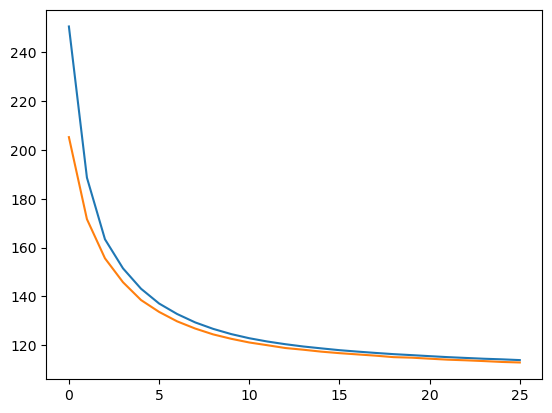

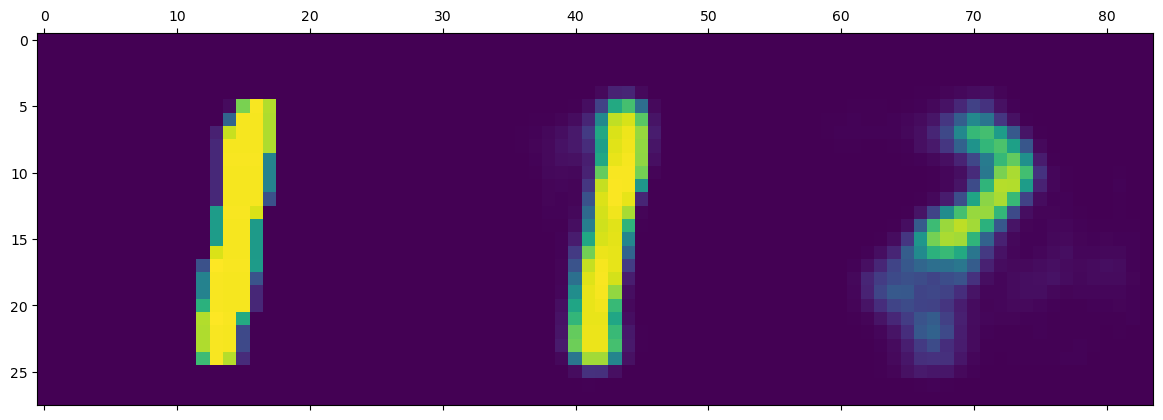

[eval]epoch:27: 100%|██████████| 313/313 [00:01<00:00, 296.11it/s, loss=112]


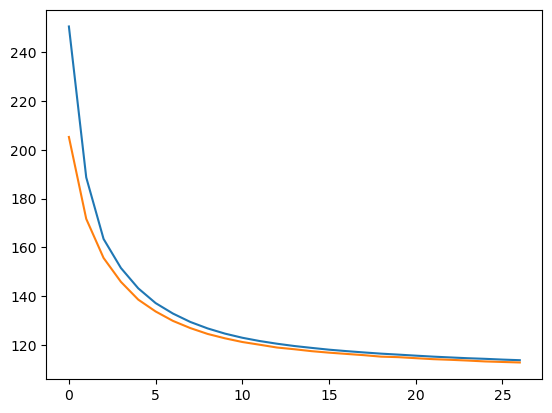

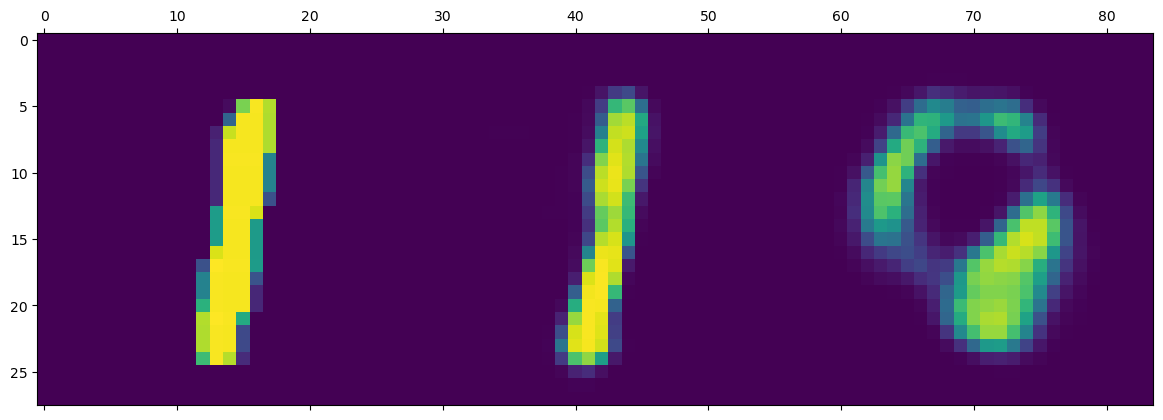

[eval]epoch:28: 100%|██████████| 313/313 [00:00<00:00, 322.75it/s, loss=112]


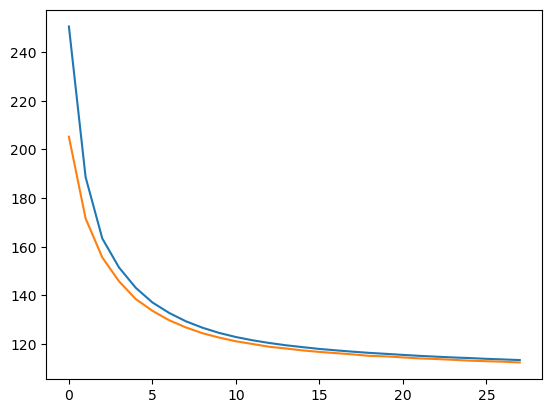

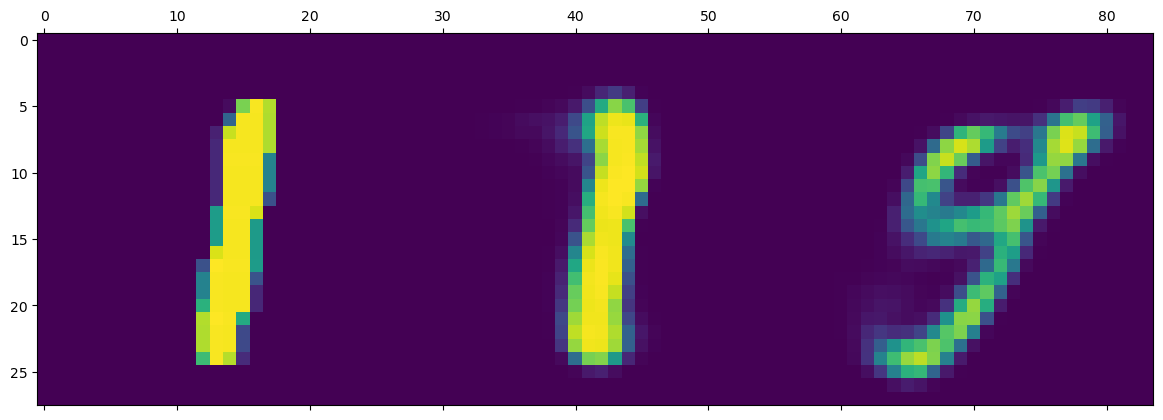

[eval]epoch:29: 100%|██████████| 313/313 [00:00<00:00, 313.45it/s, loss=112]


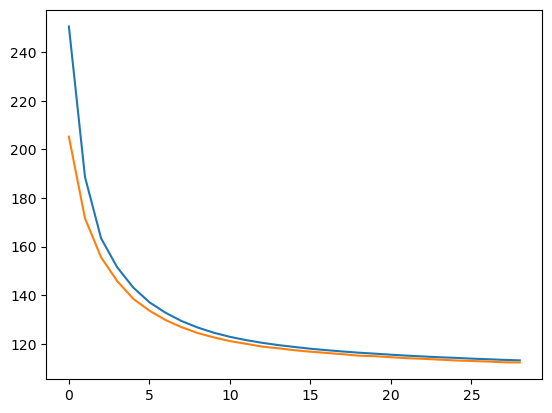

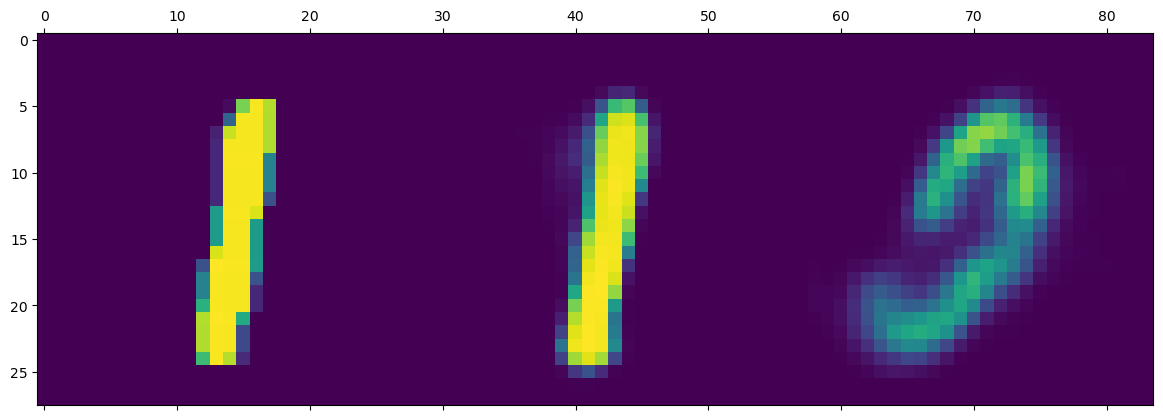

[eval]epoch:30: 100%|██████████| 313/313 [00:00<00:00, 363.70it/s, loss=112]


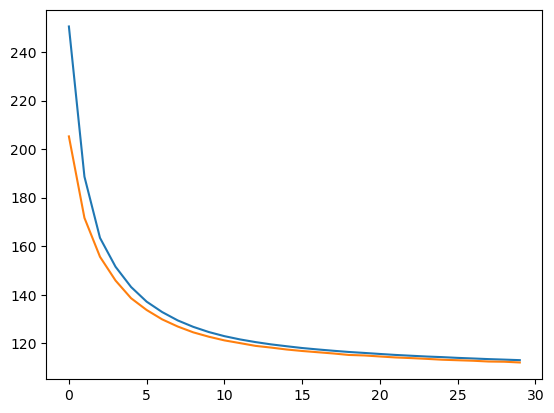

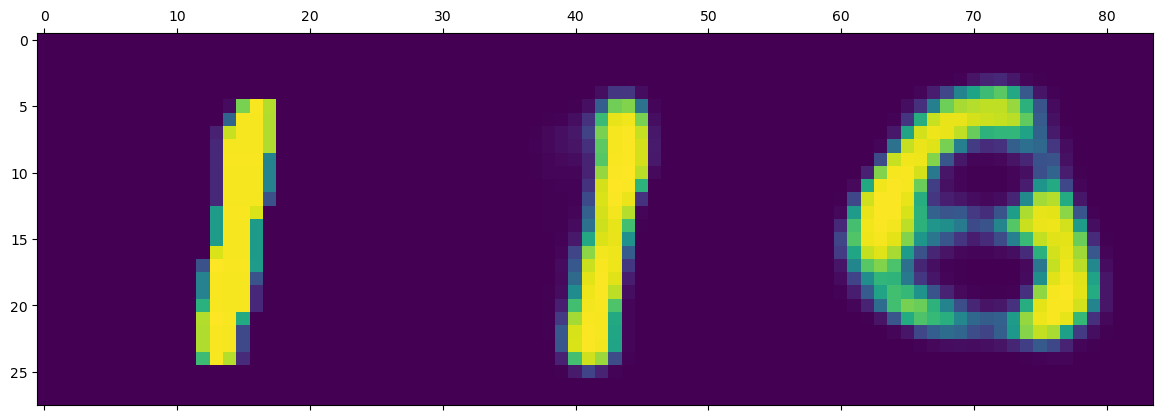

[eval]epoch:31: 100%|██████████| 313/313 [00:01<00:00, 268.72it/s, loss=112]


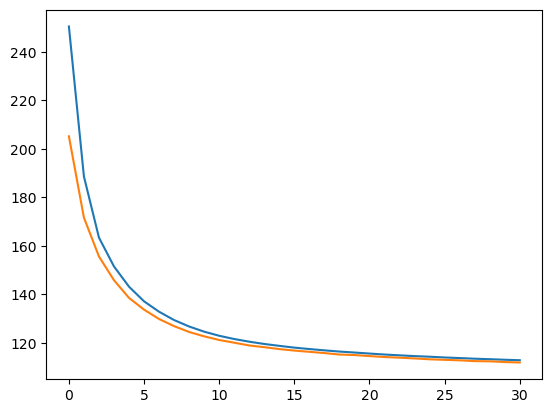

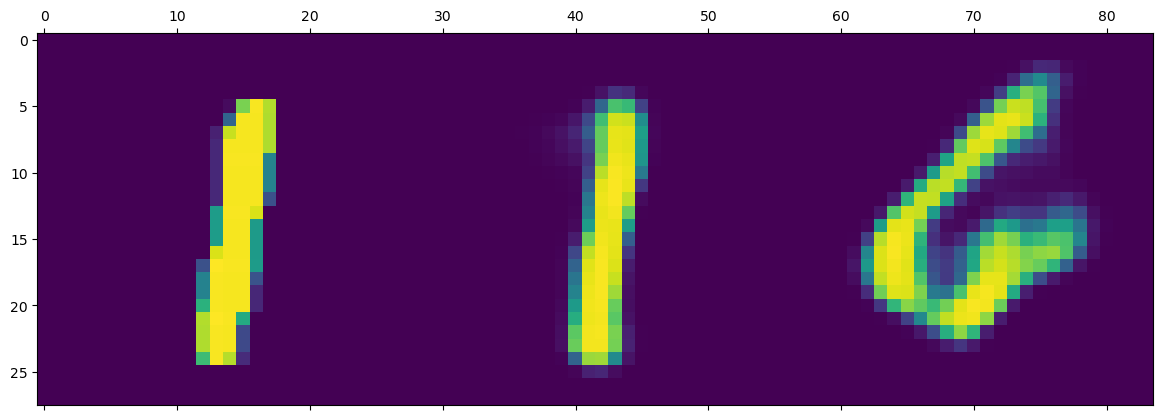

[eval]epoch:32: 100%|██████████| 313/313 [00:01<00:00, 312.11it/s, loss=112]


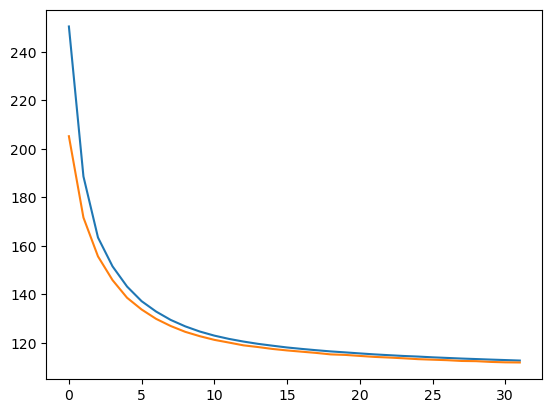

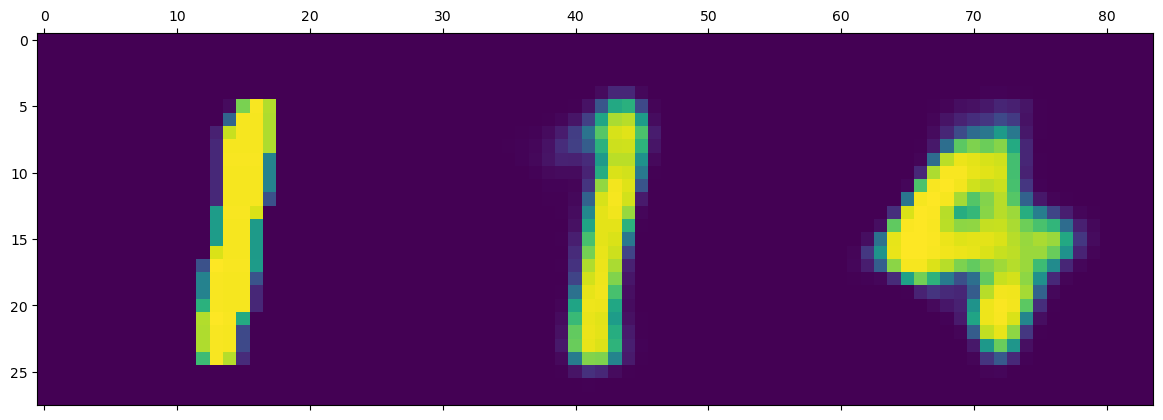

[eval]epoch:33: 100%|██████████| 313/313 [00:00<00:00, 319.49it/s, loss=111]


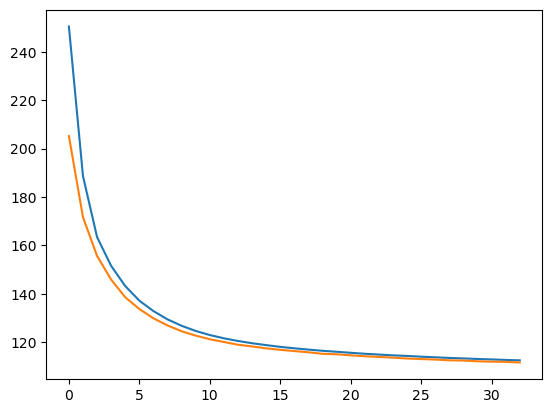

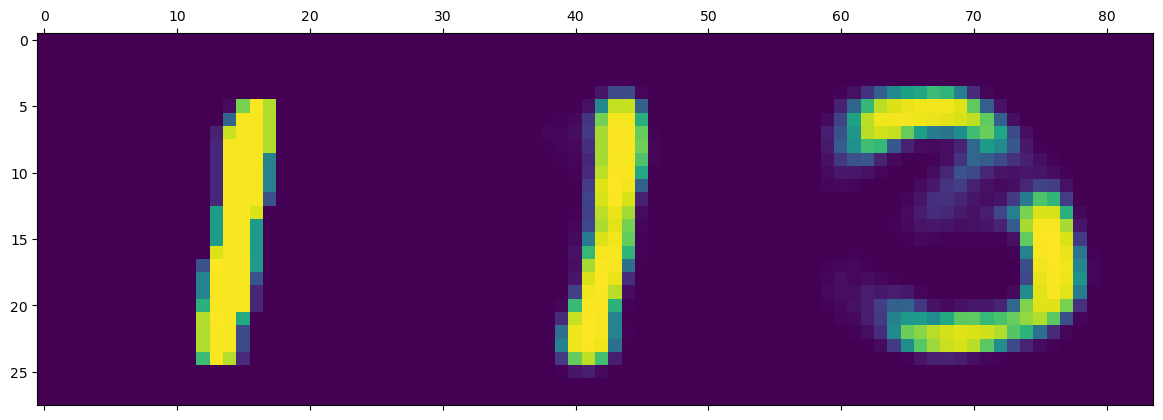

[eval]epoch:34: 100%|██████████| 313/313 [00:01<00:00, 310.99it/s, loss=111]


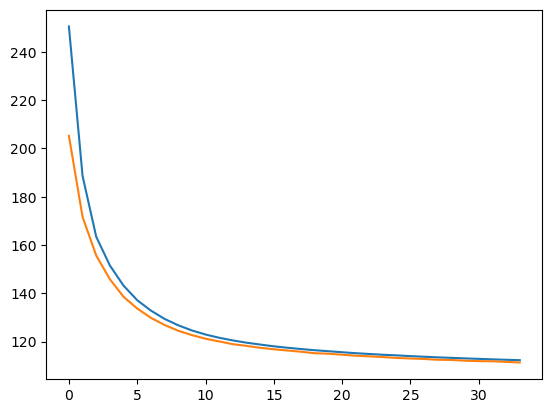

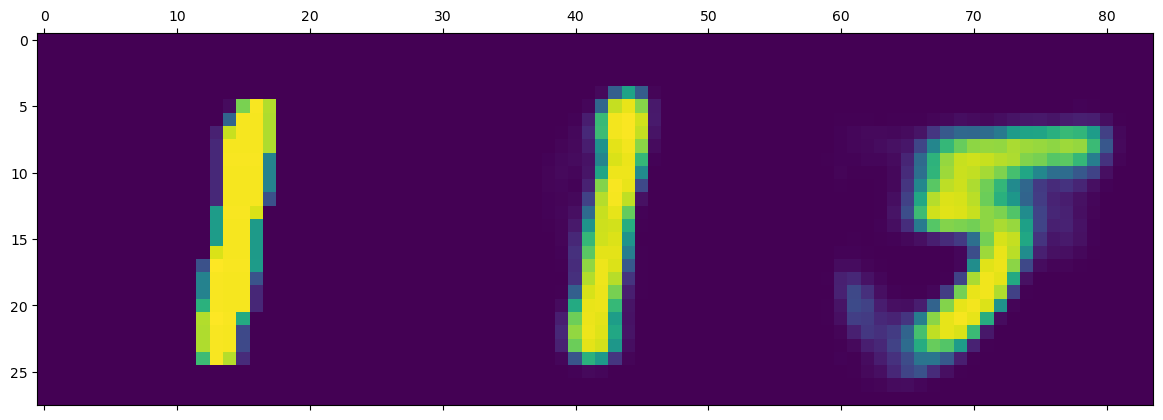

[eval]epoch:35: 100%|██████████| 313/313 [00:00<00:00, 321.35it/s, loss=111]


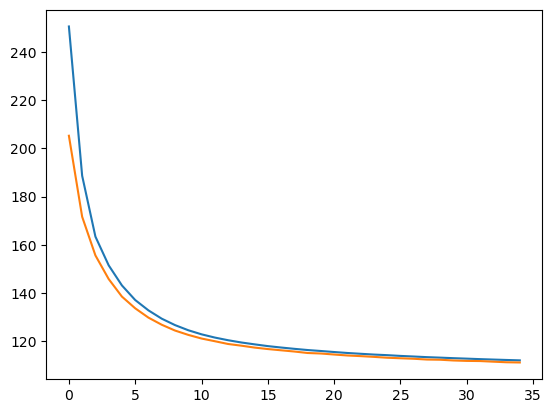

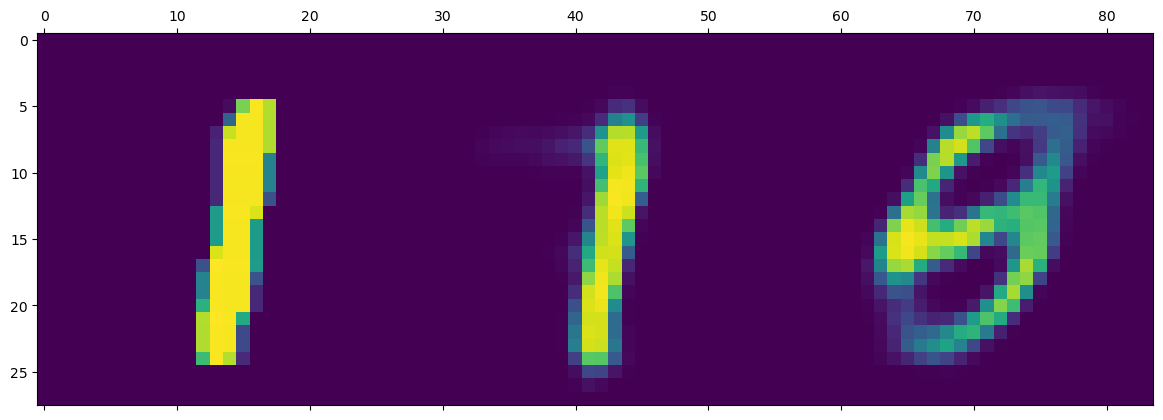

[eval]epoch:36: 100%|██████████| 313/313 [00:00<00:00, 321.05it/s, loss=111]


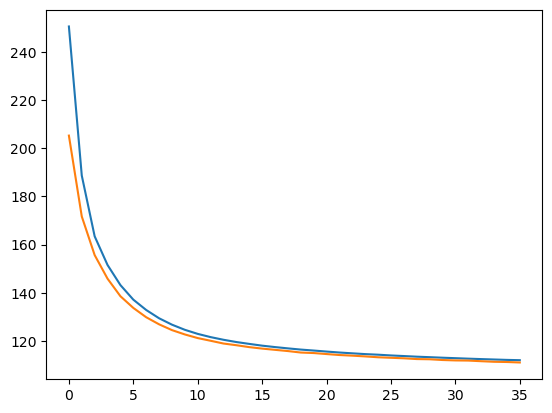

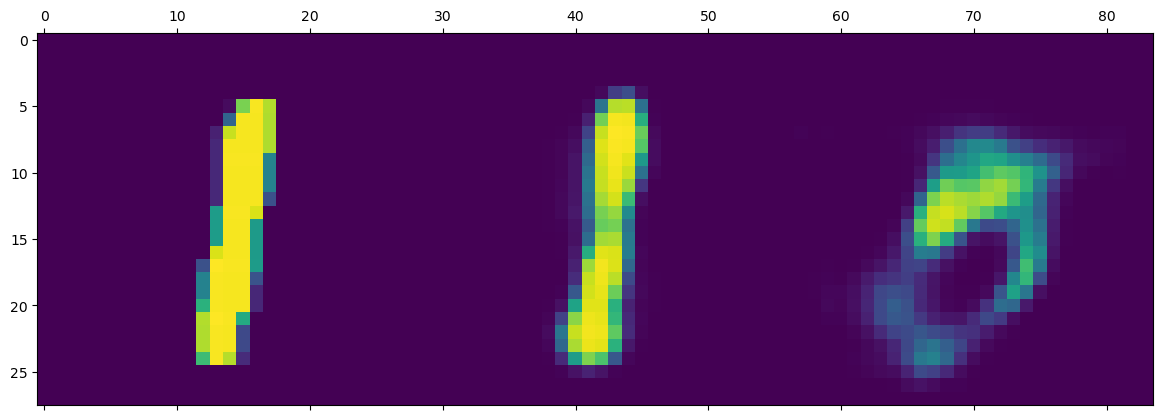

[eval]epoch:37: 100%|██████████| 313/313 [00:01<00:00, 307.32it/s, loss=111]


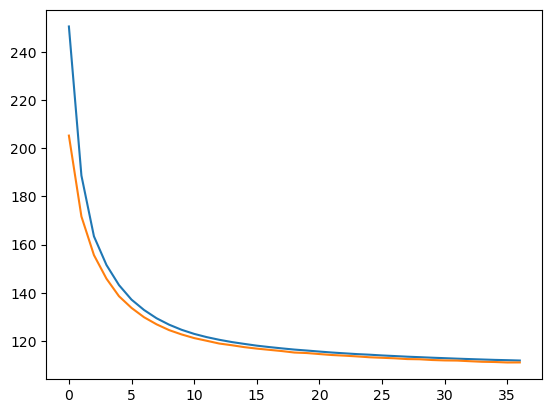

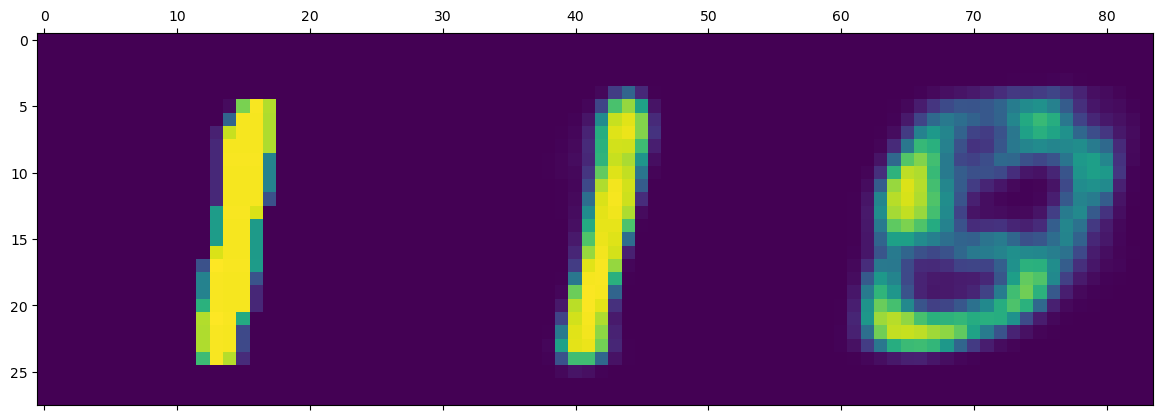

[eval]epoch:38: 100%|██████████| 313/313 [00:01<00:00, 310.85it/s, loss=111]


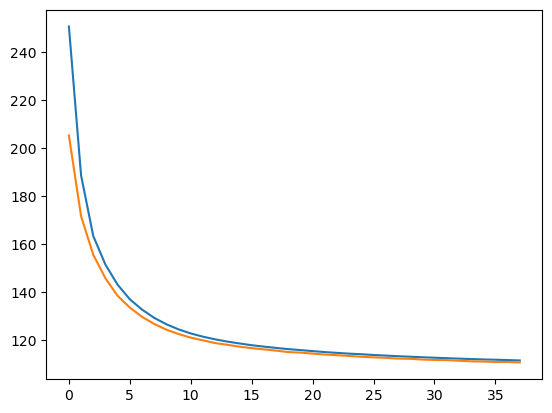

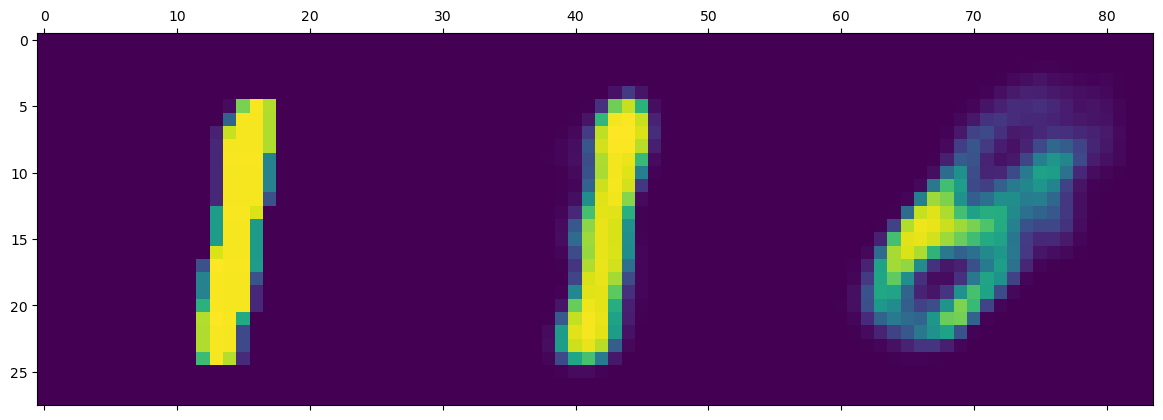

[eval]epoch:39: 100%|██████████| 313/313 [00:01<00:00, 290.02it/s, loss=111]


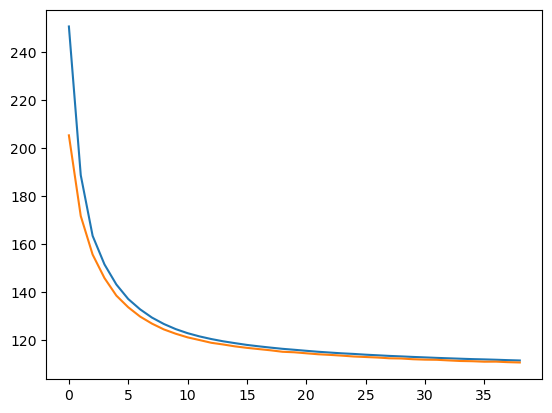

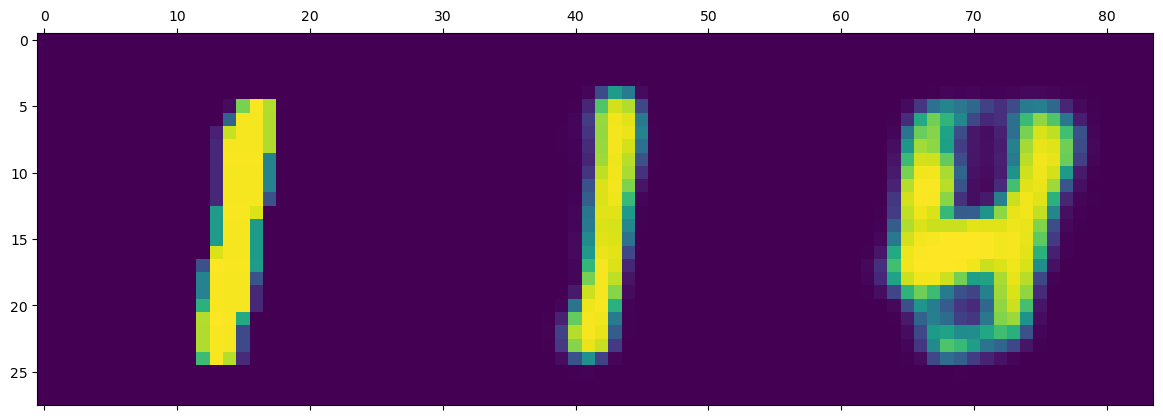

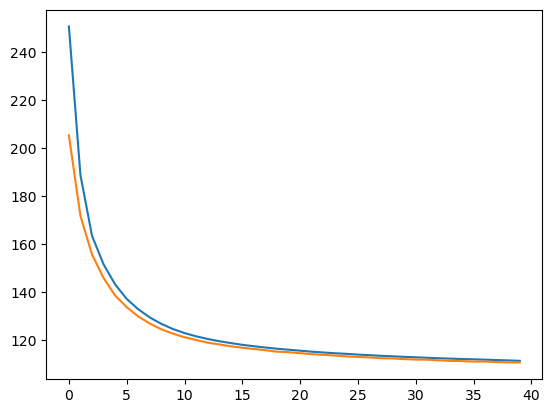

In [76]:
model = VAE(input_size,output_size,latent_size,hidden_size).to(device)
optimizer = optim.Adam(model.parameters(),lr=learning_rate)

loss_history={'train':[],'eval':[]}
for epoch in range(epochs):
    model.train()
    train_loss = 0
    train_nsample = 0
    t = tqdm(train_loader,desc=f'[train]epoch:{epoch}')
    for imgs,lbls in t:
        bs = imgs.shape[0]
        imgs=imgs.to(device).view(bs,input_size)
        re_imgs,mu,sigma = model(imgs)
        loss_re = loss_BCE(re_imgs,imgs)
        loss_norm = loss_KLD(mu,sigma)
        loss = loss_re+loss_norm
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        train_loss+=loss.item()
        train_nsample+=bs
        t.set_postfix({'loss':train_loss/train_nsample})
    loss_history['train'].append(train_loss/train_nsample)

    model.eval()
    test_loss = 0
    test_nsample = 0
    e = tqdm(test_loader,desc=f'[eval]epoch:{epoch}')
    for imgs,label in e:
        bs = imgs.shape[0]
        imgs = imgs.to(device).view(bs,input_size)
        re_imgs,mu,sigma = model(imgs)
        loss_re = loss_BCE(re_imgs,imgs)
        loss_norm = loss_KLD(mu,sigma)
        loss = loss_re+loss_norm
        test_loss+=loss.item()
        test_nsample+=bs
        e.set_postfix({'loss':test_loss/test_nsample})
    loss_history['eval'].append(test_loss/test_nsample)

    sample = torch.randn(1,latent_size).to(device)
    gen = model.decoder(sample)[0].view(28,28)
    concat = torch.cat((imgs[0].view(28,28),re_imgs[0].view(28,28),gen),1)
    plt.matshow(concat.cpu().detach().numpy())
    plt.show()

    plt.plot(range(epoch+1),loss_history['train'])
    plt.plot(range(epoch+1),loss_history['eval'])
    plt.show
    torch.save(model.state_dict(),'vae.pth')

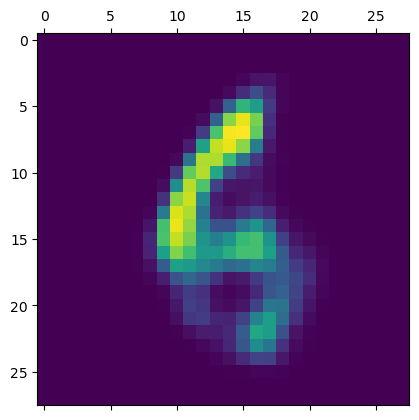

In [100]:
sample = torch.randn(1,latent_size).to(device)
generate= model.decoder(sample)[0].view(28,28)
plt.matshow(generate.cpu().detach().numpy())
plt.show()